# <font color=#3A86FF>Données nutritionnelles - Exploration </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [ACP](#ACP)
    * [Préparation des données](#Preparation-des-donnees)
    * [Centrage et réduction](#Centrage-et-reduction)
    * [Calcul des composantes principales](#Calcul-des-composantes-principales)
    * [Eboulis des valeurs propres](#Eboulis-des-valeurs-propres)
    * [Cercle des corrélations](#Cercle-des-correlations)
    * [Choix du plan factoriel](#Choix-du-plan-factoriel)
    * [Projection des individus](#Projection-des-individus)    
* [Conclusion](#Conclusion) 
* [Reste à faire](#Reste-a-faire)

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("products_clean.csv", encoding="utf-8",sep=",", low_memory=False)

In [2]:
df.head()

,states,brands,quantity,states_tags,categories,countries_tags,states_fr,main_category,creator,brands_tags,...,proteins_100g,vitamin-a_100g,iron_100g,nutrition-score-fr_100g,fat_100g,calcium_100g,salt_100g,cholesterol_100g,fiber_100g,saturated-fat_100g
0,"en:to-be-completed, en:nutrition-facts-to-be-c...",Ferme t'y R'nao,1kg,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,en:france,"A compléter,Informations nutritionnelles à com...",NaN,openfoodfacts-contributors,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,NaN,...,3.57,0.0,0.00129,14.0,28.57,0.000,0.00000,0.018,3.6,28.57
2,"en:to-be-completed, en:nutrition-facts-complet...",Torn & Glasser,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,torn-glasser,...,17.86,0.0,0.00129,0.0,17.86,0.071,0.63500,0.000,7.1,0.00
3,"en:to-be-completed, en:nutrition-facts-complet...",Grizzlies,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,grizzlies,...,17.86,NaN,0.00514,12.0,57.14,0.143,1.22428,NaN,7.1,5.36
4,"en:to-be-completed, en:nutrition-facts-complet...",Bob's Red Mill,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,bob-s-red-mill,...,8.57,NaN,NaN,NaN,1.43,NaN,NaN,NaN,5.7,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   states                   320726 non-null  object 
 1   brands                   292360 non-null  object 
 2   quantity                 104819 non-null  object 
 3   states_tags              320726 non-null  object 
 4   categories               84410 non-null   object 
 5   countries_tags           320492 non-null  object 
 6   states_fr                320726 non-null  object 
 7   main_category            84366 non-null   object 
 8   creator                  320770 non-null  object 
 9   brands_tags              292352 non-null  object 
 10  additives_fr             154680 non-null  object 
 11  countries                320492 non-null  object 
 12  categories_tags          84389 non-null   object 
 13  categories_fr            84411 non-null   object 
 14  main

In [4]:
import numpy as np

# identification des colonnes numériques et qualitatives
colonnesNum=df.select_dtypes(np.number).columns.tolist()
colonnesQual=df.select_dtypes('O').columns.tolist()

## <font color=#FB5607>ACP</font>

### Preparation des donnees

In [5]:
# filtrage sur les variables quantitatives
dataPCA=df[colonnesNum].dropna()
nomsIndividus=df.iloc[dataPCA.index,df.columns.get_loc('product_name')] # Individus
nutritionGrade=df.iloc[dataPCA.index,df.columns.get_loc('nutrition_grade_fr')] # note alphabetique de nutrition par individu
variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [6]:
dataPCA.sample(5)

,vitamin-c_100g,carbohydrates_100g,additives_n,sugars_100g,energy_100g,proteins_100g,vitamin-a_100g,iron_100g,nutrition-score-fr_100g,fat_100g,calcium_100g,salt_100g,cholesterol_100g,fiber_100g,saturated-fat_100g
80730,0.0000,95.00,7.0,77.50,1569.0,0.00,0.000000,0.00000,14.0,0.00,0.000,0.19050,0.000,0.0,0.00
118905,0.0138,38.00,0.0,0.00,858.0,27.00,0.000150,0.02880,-8.0,2.00,2.000,0.00000,0.000,19.0,0.00
131384,0.0000,34.38,1.0,21.88,916.0,4.69,0.000000,0.00056,6.0,7.81,0.094,0.29718,0.008,1.6,3.12
46507,0.0000,78.79,0.0,0.00,1393.0,12.12,0.000182,0.00327,-6.0,3.03,0.121,0.07620,0.000,15.2,0.00
7060,0.0077,8.97,2.0,0.64,188.0,0.64,0.000000,0.00023,0.0,0.00,0.026,0.45466,0.000,1.3,0.00


In [7]:
nutritionGrade

1         d
2         b
77        c
80        d
146       c
         ..
320664    c
320665    b
320738    d
320742    a
320768    b
Name: nutrition_grade_fr, Length: 128450, dtype: object

In [8]:
variables

Index(['vitamin-c_100g', 'carbohydrates_100g', 'additives_n', 'sugars_100g',
       'energy_100g', 'proteins_100g', 'vitamin-a_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'fat_100g', 'calcium_100g', 'salt_100g',
       'cholesterol_100g', 'fiber_100g', 'saturated-fat_100g'],
      dtype='object')

In [9]:
nomsIndividus

1                            Banana Chips Sweetened (Whole)
2                                                   Peanuts
77                               Granola Cranberry And Acai
80                                      Peanuts, Mixed Nuts
146                                             Cranberries
                                ...                        
320664                      Chipotle Peppers In Adobo Sauce
320665                                          Dal Makhani
320738                                        Organic Z Bar
320742                                      Natural Cassava
320768    Mint Melange Tea A Blend Of Peppermint, Lemon ...
Name: product_name, Length: 128450, dtype: object

### Centrage et reduction

In [10]:
from sklearn import preprocessing
from sklearn import decomposition

In [11]:
centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(128450, 15)

### Calcul des composantes principales

In [12]:
n_comp=15 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XCentreReduit)

PCA(n_components=15)

### Eboulis des valeurs propres

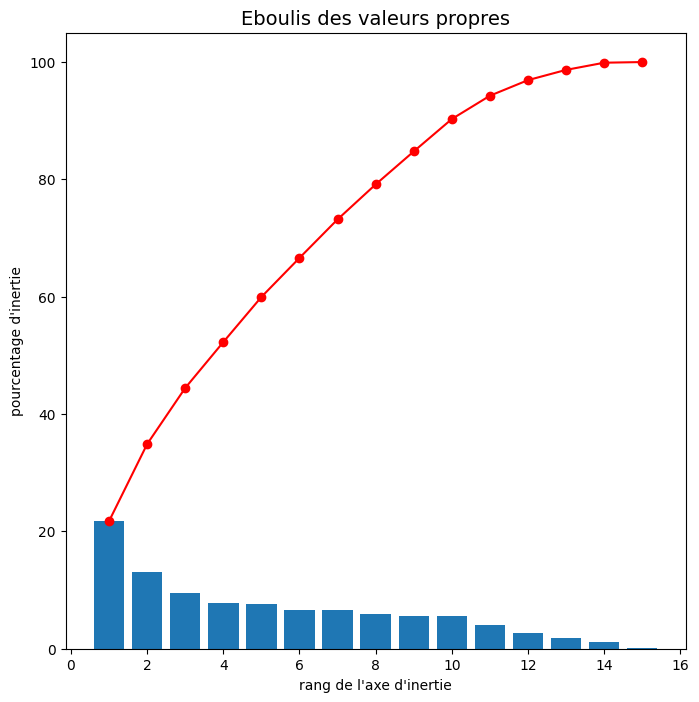

In [13]:
from matplotlib import pyplot as plt

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

In [14]:
composantesPrincipales = pca.components_ # triés par variance expliquée

### Choix du plan factoriel

In [15]:
# Selection du plan Factoriel
#dimension 1
d1=0
#dimension 2
d2=1

### Cercle des correlations

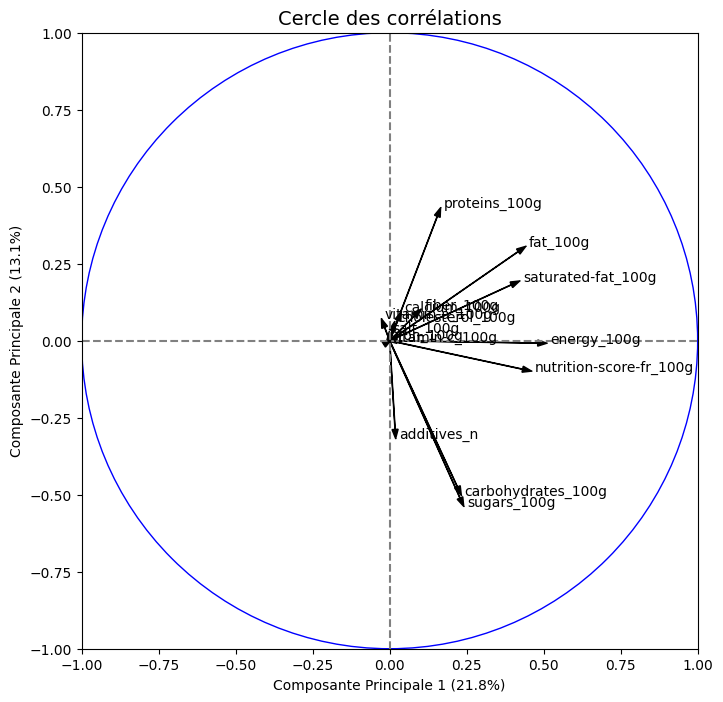

In [16]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3")) 
    plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")

### Projection des individus

In [17]:
# Projection des individus sur les composantes principales
XProjete = pca.transform(XCentreReduit)
print(f"dim Projeté:{XProjete.shape}- dim Origine:{XCentreReduit.shape}")

dim Projeté:(128450, 15)- dim Origine:(128450, 15)


In [18]:
# preparation de la palette de couleur qui reprend les codes couleurs hexa du logo nutriscore
custom_palette = {
'd': '#E08530',#Orange
 'c': '#F6CB45',#Jaune
 'e': '#D44B29',#Rouge
 'a': '#387E47',#Vert foncé
 'b': '#91B849' #Vert   
}
custom_palette['a']

'#387E47'

In [19]:
list(custom_palette.values())

['#E08530', '#F6CB45', '#D44B29', '#387E47', '#91B849']

In [20]:
list(custom_palette.keys())

['d', 'c', 'e', 'a', 'b']

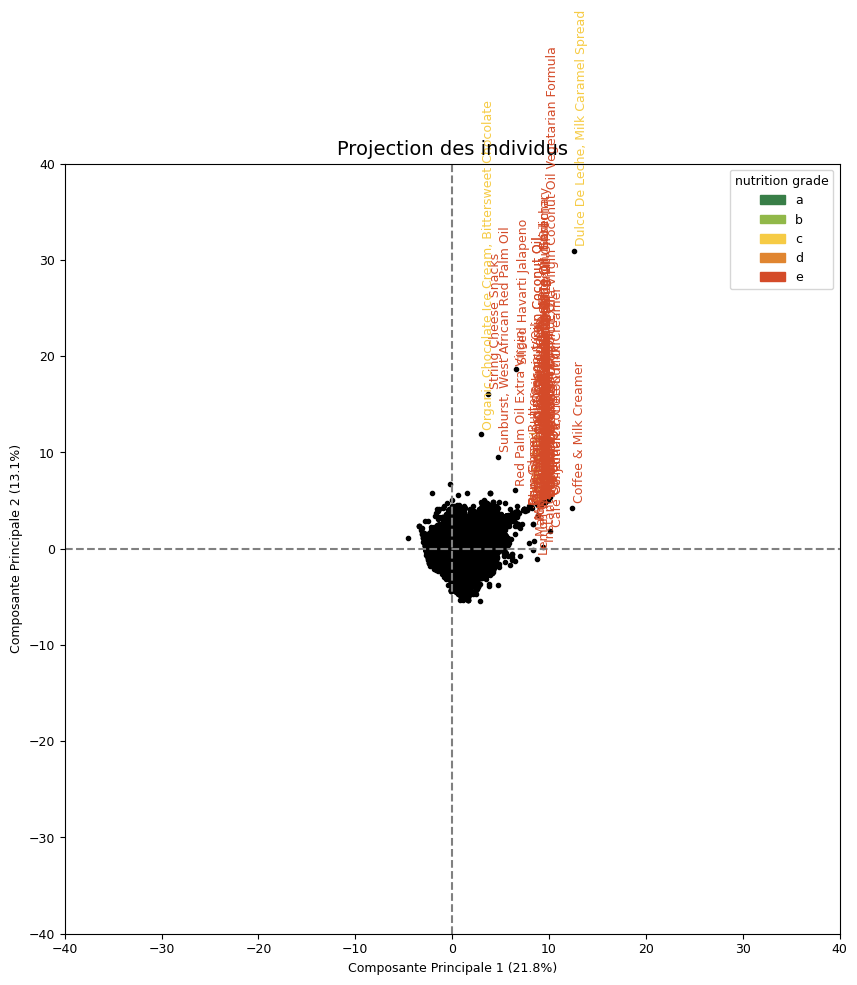

In [21]:
# visualisation
from matplotlib import pyplot as plt

# taille du graphique
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = '9.0'

# configuration de la bordure
plt.xlim(-40,40)
plt.ylim(-40,40)

# affichage des lignes horizontales et verticales
plt.plot([-40, 40], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-40, 40], color='grey', ls='--')

plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Projection des individus',fontsize=14,fontweight='normal')



# representer le nuage projeté sur le 1er plan factoriel (composé des 2 premieres composantes principales 0 et 1)
plt.scatter(XProjete[:,d1],XProjete[:,d2],marker=".",color="black")

for i in range(len(nomsIndividus)):   # nombre d'individus
    
    p=np.array([XProjete[i,d1],XProjete[i,d2]])

    color=nutritionGrade.values[i]

    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>8.5:
        label=nomsIndividus.values[i]
        #print(f"label[{i}]:{label} | test:{not(pd.isnull(label))} | color:{color}") # debug
        if not pd.isnull(label):
            plt.text(XProjete[i,d1]+0.1, XProjete[i,d2]+0.8, label ,rotation=90,color=custom_palette[color])
    #plt.annotate(nomsIndividus.values[i],xy =(XProjete[i,0],XProjete[i,1]),xytext =(XProjete[i,0],XProjete[i,1]))

import matplotlib.patches as mpatches

a_patch = mpatches.Patch(color=custom_palette['a'], label='a')
b_patch = mpatches.Patch(color=custom_palette['b'], label='b')
c_patch = mpatches.Patch(color=custom_palette['c'], label='c')
d_patch = mpatches.Patch(color=custom_palette['d'], label='d')
e_patch = mpatches.Patch(color=custom_palette['e'], label='e')


plt.legend(title="nutrition grade",handles=[a_patch, b_patch, c_patch, d_patch, e_patch])

#import os
#os.system('say "jai fini de dessiner"')

Observations:
* sur l'axe du nutrition score, la note de nutrition ne semble pas correlee
* la composante energy / nutrition_score explique toute seule une composante
* sugars et carbohydrates (glucides) expliquent fortement l'axe vertical negatif
* le gras explique modéremment l'axe vertical positif en opposition avec les glucides/sucres

In [22]:
df.groupby("nutrition_grade_fr").agg({
    "nutrition-score-fr_100g":"mean"
})

,nutrition-score-fr_100g
nutrition_grade_fr,
a,-3.407644
b,0.906673
c,6.367561
d,14.066934
e,21.962305


Calculons le coefficient de corrélation (Pearson) entre le "nutrition score" et la "note de nutrition"

In [23]:
# conversion numerique de la note alphabetique de nutrition
gradeNotationMapper={"a":5,"b":4,"c":3,"d":2,"e":1}
nutritionNote=nutritionGrade.replace(gradeNotationMapper)

In [24]:
# coeffiction de correlation Pearson entre le nutrition score et la note "numerique" de nutrition
dataPCA['nutrition-score-fr_100g'].corr(nutritionNote)

-0.9636984638618421

=> le nutrition-score-fr_100G varie à l'opposée de la note de nutrition: plus le nutrition score est elevé plus la note de nutrition est basse

In [25]:
time.time() - now

12.2969651222229

## <font color=#FB5607>Conclusion</font>

On peut distinguer 3 axes de definition d'un produit alimentaire:
* les aliments riches en protéines
* les aliments riches en sucre lent/rapide
* les aliments energetiques

## <font color=#FF006E>Reste a faire</font>

* Analyse Univariée (tendances centrales, moyenne, mediane)
* ACP avec moins de variables